In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression

In [27]:
x,y = make_regression(n_samples = 1000,n_features = 3,n_targets = 1,noise = 3)

In [28]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

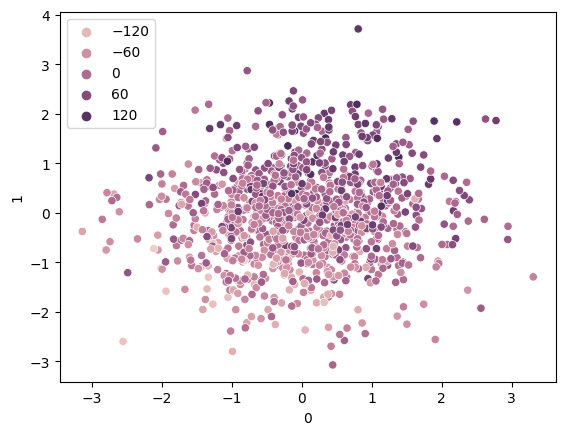

In [29]:
sns.scatterplot(x= pd.DataFrame(x)[0],y = pd.DataFrame(x)[1],hue = y)

<Axes: xlabel='0', ylabel='2'>

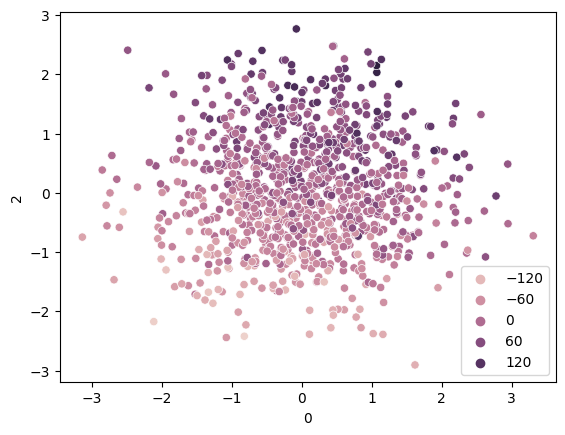

In [30]:
sns.scatterplot(x= pd.DataFrame(x)[0],y = pd.DataFrame(x)[2],hue = y)

<Axes: xlabel='2', ylabel='1'>

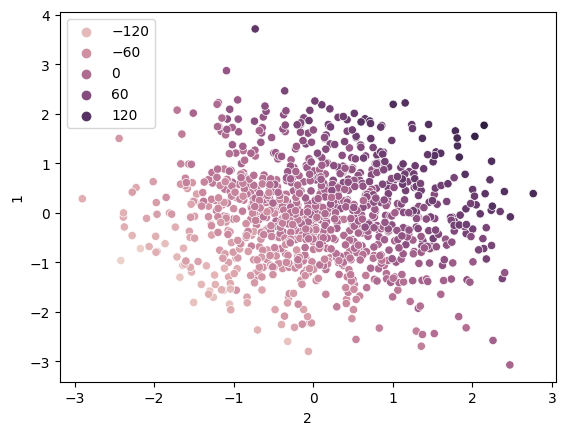

In [31]:
sns.scatterplot(x= pd.DataFrame(x)[2],y = pd.DataFrame(x)[1],hue = y)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [35]:
from sklearn.svm import SVR

In [36]:
svr = SVR(kernel  = "linear")

In [37]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [39]:
svr.coef_

array([[12.46796809, 34.71545429, 45.85089081]])

In [41]:
y_pred = svr.predict(x_test)

In [42]:
from sklearn.metrics import r2_score

In [44]:
print(r2_score(y_test,y_pred))

0.9969270977191901


# Hyperparameter Tunning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel' :['linear', 'poly', 'rbf','sigmoid'],
    'epsilon' : [0.1,0.2,0.3]

}

In [50]:
grid = GridSearchCV(SVR(),param_grid = param,refit = True,cv =5,verbose = 3)

In [51]:
grid.fit(x_test,y_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.330 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.366 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.340 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.352 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.333 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=poly;, score=0.674 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=poly;, score=0.585 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=poly;, score=0.715 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=poly;, score=0.370 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=poly;, score=0.606 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, s

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [52]:
grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [54]:
y_pred_new = grid.predict(x_test)
print(r2_score(y_test,y_pred_new))

0.9969252727100397
